# IE 582 - HOMEWORK 4

### Gizem Güneş

# TASK 1

In [1]:
#install.packages("https://cran.r-project.org/src/contrib/Archive/rlang/rlang_0.4.1.tar.gz", repo=NULL, type="source")
#install.packages('dplyr')
library(MASS)
library(dplyr)
library(lubridate)
library(reshape2)
library(tidyr)


Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'tidyr'

The following object is masked from 'package:reshape2':

    smiths



In [2]:
#Data is read as following :
matches=read.csv("C:/Users/gizem/Desktop/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/HW4/matches.csv")
bets=read.csv("C:/Users/gizem/Desktop/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/HW4/bets.csv")
booking=read.csv("C:/Users/gizem/Desktop/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/HW4/booking.csv")
goals=read.csv("C:/Users/gizem/Desktop/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/HW4/goals.csv")
stats=read.csv("C:/Users/gizem/Desktop/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/HW4/stats.csv")

#Filtering English Premier League and removing NA values in Match_status :
matches = filter(matches, league_id == 148)
matches=matches %>% drop_na(match_status)

In [3]:
#Necessary instances are selected as following :
matches2=matches
matches2$date = as_datetime(matches2$epoch)
matches2 = select(matches2, match_id, date, match_hometeam_id, match_hometeam_name, match_awayteam_id, match_awayteam_name, 
                            match_hometeam_score, match_awayteam_score, league_id, match_status)

head(matches2)

match_id,date,match_hometeam_id,match_hometeam_name,match_awayteam_id,match_awayteam_name,match_hometeam_score,match_awayteam_score,league_id,match_status
13331,2017-09-16 11:30:00,2619,Crystal Palace,2614,Southampton,0,1,148,Finished
13329,2017-09-16 14:00:00,2623,Watford,2626,Manchester City,0,6,148,Finished
13327,2017-09-16 14:00:00,2621,Liverpool,2629,Burnley,1,1,148,Finished
13456,2017-09-16 14:00:00,2654,Sheffield Utd,2641,Norwich,0,1,148,Finished
13324,2017-09-17 12:30:00,2616,Chelsea,2617,Arsenal,0,0,148,Finished
13323,2017-09-17 15:00:00,2627,Manchester United,2612,Everton,4,0,148,Finished


In [4]:
#Probabilities of odd_bookmakers
bets2 = bets
bets2$odd_date = as_datetime(bets2$odd_epoch)
bets2 = select(bets2, match_id, odd_date, odd_bookmakers, variable, value)
bets2 = filter(bets2, variable == "odd_x" | variable == "odd_1"| variable == "odd_2")
bets2$prob = 1/bets2$value
bets2 = dcast(bets2, match_id + odd_date + odd_bookmakers ~ variable, value.var = "prob")
bets2$sum = bets2$odd_1 + bets2$odd_2 + bets2$odd_x
bets2$prob_1 = bets2$odd_1 / bets2$sum
bets2$prob_2 = bets2$odd_2 / bets2$sum
bets2$prob_x = bets2$odd_x / bets2$sum
bets2 = select(bets2, match_id, odd_date, odd_bookmakers, prob_1, prob_x, prob_2)

date = select(matches2, match_id, date)
bets2 = left_join(x=date, y=bets2, by="match_id")
bets2 = filter(bets2, date > (odd_date + hours(1)))
bets2 = bets2 %>% group_by(match_id, odd_bookmakers, prob_1, prob_x, prob_2) %>% summarise(odd_date = max(odd_date))
bets2 = select(bets2, -odd_date)
bets2 = bets2 %>% group_by(match_id) %>% summarise(prob_1=mean(prob_1),prob_x=mean(prob_x),prob_2=mean(prob_2)) 
head(bets2)

match_id,prob_1,prob_x,prob_2
150842,0.1880534,0.2617220,0.5502247
150844,0.3258270,0.2861687,0.3880043
156845,0.3989720,0.3186946,0.2823334
156847,0.5436984,0.2679607,0.1883409
156848,0.3407637,0.3131682,0.3460681
156850,0.5237476,0.2796348,0.1966176


In [5]:
data = left_join(x=matches2, y=bets2, by="match_id")
data = select(data, match_id, date, match_hometeam_id, match_hometeam_name, match_awayteam_id, match_awayteam_name, 
                            match_hometeam_score, match_awayteam_score, match_status, prob_1, prob_x, prob_2)
head(data)

match_id,date,match_hometeam_id,match_hometeam_name,match_awayteam_id,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_status,prob_1,prob_x,prob_2
13331,2017-09-16 11:30:00,2619,Crystal Palace,2614,Southampton,0,1,Finished,NA,NA,NA
13329,2017-09-16 14:00:00,2623,Watford,2626,Manchester City,0,6,Finished,NA,NA,NA
13327,2017-09-16 14:00:00,2621,Liverpool,2629,Burnley,1,1,Finished,NA,NA,NA
13456,2017-09-16 14:00:00,2654,Sheffield Utd,2641,Norwich,0,1,Finished,NA,NA,NA
13324,2017-09-17 12:30:00,2616,Chelsea,2617,Arsenal,0,0,Finished,NA,NA,NA
13323,2017-09-17 15:00:00,2627,Manchester United,2612,Everton,4,0,Finished,NA,NA,NA


In [6]:
#Team average goals in last 5 games for each
for (i in data$match_id){   
        goals=0
    
        data[data$match_id==i,"hometeam_goals"]=goals
        
        e=data[data$match_id==i,"date"]
        matches3=data[data$date<e,]
        matches3=matches3[(matches3$match_hometeam_id==data[data$match_id==i,3] | 
                           matches3$match_awayteam_id==data[data$match_id==i,3]),]
    
        matches3=matches3[order(matches3$date,decreasing = T),]
        max=nrow(matches3)
        if(max>5){max=5}
        if (max>0){matches3=matches3[1:max,]}
        if(max>0){
        
            for (j in 1:max){

                    if(matches3[j,5]==data[data$match_id==i,3]){

                        goals=goals+matches3[j,8]
                    }
                    
                    if(matches3[j,3]==data[data$match_id==i,3] ){

                        goals=goals+matches3[j,7]
                    }
                    
            }
        data[data$match_id==i,"hometeam_goals"]=goals/max
        }

    }
    
   for (i in data$match_id){  
        goals=0
    
        data[data$match_id==i,"awayteam_goals"]=goals
        
        e=data[data$match_id==i,"date"]
        matches3=data[data$date<e,]
        matches3=matches3[(matches3$match_hometeam_id==data[data$match_id==i,5] | 
                           matches3$match_awayteam_id==data[data$match_id==i,5]),]
    
        matches3=matches3[order(matches3$date,decreasing = T),]
        max=nrow(matches3)
        if(max>5){max=5}
        if (max>0){matches3=matches3[1:max,]}
        if(max>0){
        
            for (j in 1:max){

                    if(matches3[j,5]==data[data$match_id==i,5] ){

                        goals=goals+matches3[j,8]
                    }
                  
                    if(matches3[j,3]==data[data$match_id==i,5] ){

                        goals=goals+matches3[j,7]
                    }        
            }
        data[data$match_id==i,"awayteam_goals"]=goals/max
        
        }  
}
#data[data$match_id == 218349,]

In [7]:
#Team average goals in last 5 games between each other
for (i in data$match_id){   
        goals_for=0
        goals_against=0
    
        data[data$match_id==i,"hometeam_goals_btw"]=goals_for
        data[data$match_id==i,"awayteam_goals_btw"]=goals_against
        
        
        e=data[data$match_id==i,"date"]
        matches3=data[data$date<e,]
        matches3=matches3[(matches3$match_hometeam_id==data[data$match_id==i,3] | 
                           matches3$match_awayteam_id==data[data$match_id==i,3]),]
        matches3=matches3[(matches3$match_hometeam_id==data[data$match_id==i,5] | 
                           matches3$match_awayteam_id==data[data$match_id==i,5]),]
    
        matches3=matches3[order(matches3$date,decreasing = T),]
        max=nrow(matches3)
        if(max>5){max=5}
        if (max>0){matches3=matches3[1:max,]}
        if(max>0){
        
            for (j in 1:max){

                    if(matches3[j,5]==data[data$match_id==i,3]){

                        goals_for=goals_for+matches3[j,8]
                        goals_against=goals_against+matches3[j,7]
                    }
                    
                    if(matches3[j,3]==data[data$match_id==i,3] ){

                        goals_for=goals_for+matches3[j,7]
                        goals_against=goals_against+matches3[j,8]
                    }
                    
            }
        data[data$match_id==i,"hometeam_goals_btw"]=goals_for/max
        data[data$match_id==i,"awayteam_goals_btw"]=goals_against/max
        
        
        }

    }
    
#data[data$match_id == 218349,]

In [8]:
#Average team points in last 5 matches
data['hometeam_win']=ifelse(data$match_hometeam_score>data$match_awayteam_score,1,0)
data['tie']=ifelse(data$match_hometeam_score==data$match_awayteam_score,1,0)
data['awayteam_win']=ifelse(data$match_hometeam_score<data$match_awayteam_score,1,0)

for (i in data$match_id){   
        win=0
        loss=0
        tie=0
    
        data[data$match_id==i,"hometeam_win_number"]=win
        data[data$match_id==i,"hometeam_tie_number"]=tie
        data[data$match_id==i,"hometeam_loss_number"]=loss
        
        e=data[data$match_id==i,"date"]
        matches3=data[data$date<e,]
        matches3=matches3[(matches3$match_hometeam_id==data[data$match_id==i,3] | 
                           matches3$match_awayteam_id==data[data$match_id==i,3]),]
    
        matches3=matches3[order(matches3$date,decreasing = T),]
        max=nrow(matches3)
        if(max>5){max=5}
        if (max>0){matches3=matches3[1:max,]}
        if(max>0){
        
            for (j in 1:max){

                    if(matches3[j,5]==data[data$match_id==i,3] & matches3[j,19]==1){

                        win=win+1
                    }
                    if(matches3[j,5]==data[data$match_id==i,3] & matches3[j,17]==1){

                        loss=loss+1
                    }
                    if(matches3[j,3]==data[data$match_id==i,3] & matches3[j,17]==1){

                        win=win+1
                    }
                    if(matches3[j,3]==data[data$match_id==i,3] & matches3[j,19]==1){

                        loss=loss+1
                    }
                    if(matches3[j,18]==1){

                        tie=tie+1
                    }
                }
        data[data$match_id==i,"hometeam_win_number"]=win
        data[data$match_id==i,"hometeam_tie_number"]=tie
        data[data$match_id==i,"hometeam_loss_number"]=loss
        
        }
        
    }

for (i in data$match_id){  
        win=0
        loss=0
        tie=0
        data[data$match_id==i,"awayteam_win_number"]=win
        data[data$match_id==i,"awayteam_tie_number"]=tie
        data[data$match_id==i,"awayteam_loss_number"]=loss
        
        e=data[data$match_id==i,"date"]
        matches3=data[data$date<e,]
        matches3=matches3[(matches3$match_hometeam_id==data[data$match_id==i,5] | 
                           matches3$match_awayteam_id==data[data$match_id==i,5]),]
    
        matches3=matches3[order(matches3$date,decreasing = T),]
        max=nrow(matches3)
        if(max>5){max=5}
        if (max>0){matches3=matches3[1:max,]}
        if(max>0){
        
            for (j in 1:max){

                    if(matches3[j,5]==data[data$match_id==i,5] & matches3[j,19]==1){

                        win=win+1
                    }
                    if(matches3[j,5]==data[data$match_id==i,5] & matches3[j,17]==1){

                        loss=loss+1
                    }
                    if(matches3[j,3]==data[data$match_id==i,5] & matches3[j,17]==1){

                        win=win+1
                    }
                    if(matches3[j,3]==data[data$match_id==i,5] & matches3[j,19]==1){

                        loss=loss+1
                    }
                    if(matches3[j,18]==1){

                        tie=tie+1
                    }
                }
        data[data$match_id==i,"awayteam_win_number"]=win
        data[data$match_id==i,"awayteam_tie_number"]=tie
        data[data$match_id==i,"awayteam_loss_number"]=loss
        
        }
        
       
        
    }

#data[data$match_id == 218349,]

data[,"avg_hometeam_points"]=(3*data[,"hometeam_win_number"]+1*data[,"hometeam_tie_number"])/max
data[,"avg_awayteam_points"]=(3*data[,"awayteam_win_number"]+1*data[,"awayteam_tie_number"])/max
data[,c("hometeam_win","tie","awayteam_win","hometeam_win_number","hometeam_tie_number","hometeam_loss_number",
          "awayteam_win_number","awayteam_tie_number","awayteam_loss_number")]=NULL

In [9]:
data = select(data, match_id, date, match_hometeam_id, match_hometeam_name, match_awayteam_id, match_awayteam_name, 
              match_hometeam_score, match_awayteam_score, hometeam_goals, awayteam_goals, hometeam_goals_btw,
              awayteam_goals_btw, avg_hometeam_points, avg_awayteam_points, prob_1, prob_x, prob_2)
data$total_goals = data$match_hometeam_score + data$match_awayteam_score
data$total_goals_class = ifelse(data$total_goals > 2.5, 1, 0)
data$total_goals_class = as.factor(data$total_goals_class)
#Class 1 means total goals of a match is higher than 2.5; Class 0 means the opposite.

#data[1:10,]

In [10]:
#Input and output data are created as following :
data_reg  = select(data, hometeam_goals, awayteam_goals, hometeam_goals_btw, awayteam_goals_btw, avg_hometeam_points, 
                   avg_awayteam_points, prob_1, prob_x, prob_2, total_goals)
data_class = select(data, hometeam_goals, awayteam_goals, hometeam_goals_btw, awayteam_goals_btw, avg_hometeam_points, 
                    avg_awayteam_points, prob_1, prob_x, prob_2, total_goals_class)

head(data_reg)
head(data_class)

hometeam_goals,awayteam_goals,hometeam_goals_btw,awayteam_goals_btw,avg_hometeam_points,avg_awayteam_points,prob_1,prob_x,prob_2,total_goals
0,0,0,0,0,0,NA,NA,NA,1
0,0,0,0,0,0,NA,NA,NA,6
0,0,0,0,0,0,NA,NA,NA,2
0,0,0,0,0,0,NA,NA,NA,1
0,0,0,0,0,0,NA,NA,NA,0
0,0,0,0,0,0,NA,NA,NA,4


hometeam_goals,awayteam_goals,hometeam_goals_btw,awayteam_goals_btw,avg_hometeam_points,avg_awayteam_points,prob_1,prob_x,prob_2,total_goals_class
0,0,0,0,0,0,NA,NA,NA,0
0,0,0,0,0,0,NA,NA,NA,1
0,0,0,0,0,0,NA,NA,NA,0
0,0,0,0,0,0,NA,NA,NA,0
0,0,0,0,0,0,NA,NA,NA,0
0,0,0,0,0,0,NA,NA,NA,1


In [11]:
#Testing Missing Values
table(is.na(data$prob_1))


FALSE  TRUE 
  329   372 

#### What we should do with NA values will be evaluated under three options. First one is to remove the rows including NA values. Second one is to replace the NA values by the mean of the corresponding column. Lastly, third one is to remove all columns of probabilities. In addition, dividing the data into training and test data is evaluated under two options, namely stratification and random sampling.

In [12]:
#Removing the rows which include NA values in probabilities:
data_reg_NA = data_reg %>% drop_na(prob_1)
data_class_NA = data_class %>% drop_na(prob_1)

#Replacing the NA values with mean of the column
data_reg$prob_1[is.na(data_reg$prob_1)] <- mean(data_reg$prob_1, na.rm = TRUE)
data_reg$prob_x[is.na(data_reg$prob_x)] <- mean(data_reg$prob_x, na.rm = TRUE)
data_reg$prob_2[is.na(data_reg$prob_2)] <- mean(data_reg$prob_2, na.rm = TRUE)
data_class$prob_1[is.na(data_class$prob_1)] <- mean(data_class$prob_1, na.rm = TRUE)
data_class$prob_x[is.na(data_class$prob_x)] <- mean(data_class$prob_x, na.rm = TRUE)
data_class$prob_2[is.na(data_class$prob_2)] <- mean(data_class$prob_2, na.rm = TRUE)
#table(is.na(data_reg$prob_1))

#Removing the probabilities of odd_bookmakers from input data set :
data_reg_NoP = select(data_reg, -prob_1, -prob_2, -prob_x)
data_class_NoP = select(data_class, -prob_1,-prob_2,-prob_x)


### Stratification

In [13]:
#Imbalanced classes :
table(data$total_goals_class)
table(data$total_goals)

#Stratification is implemented due to imbalanced classes as following :
#Classification Problem
library(caret)
set.seed(1)

#First option (removing the rows including NA values)
train_class_NA <- sample_frac(data_class_NA, 0.70,)
dpart <- as.numeric(rownames(train_class_NA))
test_class_NA <- data_class_NA[-dpart,]

#Second option (replacing the NA values by the mean of the corresponding column)
train_class <- sample_frac(data_class, 0.70,)
dpart <- as.numeric(rownames(train_class))
test_class <- data_class[-dpart,]

#Third option (removing all columns of probabilities)
train_class_NoP <- sample_frac(data_class_NoP, 0.70,)
dpart <- as.numeric(rownames(train_class_NoP))
test_class_NoP <- data_class_NoP[-dpart,]


#Stratification for Regression Problem
#First option
train_reg_NA <- sample_frac(data_reg_NA, 0.70,)
dpart <- as.numeric(rownames(train_reg_NA))
test_reg_NA <- data_reg_NA[-dpart,]

#Second option
train_reg <- sample_frac(data_reg, 0.70,)
dpart = as.numeric(rownames(train_reg))
test_reg = data_reg[-dpart,]

#Third option
train_reg_NoP <- sample_frac(data_reg_NoP, 0.70,)
dpart = as.numeric(rownames(train_reg_NoP))
test_reg_NoP <- data_reg_NoP[-dpart,]



  0   1 
308 393 


  0   1   2   3   4   5   6   7   8   9 
 43 103 162 164 126  66  23   9   3   2 

Loading required package: lattice
Loading required package: ggplot2


In [14]:
#Evaluation of Options for Classification
#install.packages('MLmetrics')
library(MLmetrics)
#Building model with the data removing NA values (First option)
logistic1 = glm(total_goals_class~., data=train_class_NA, family="binomial")
test_class_NA$pred <- predict(logistic1, test_class_NA, type="response")
test_class_NA$pred = ifelse(test_class_NA$pred> 0.5, 1, 0)

#Building model with the data including replaced NA values (Second option)
logistic2 = glm(total_goals_class~., data=train_class, family="binomial")
test_class$pred <- predict(logistic2, test_class, type="response")
test_class$pred = ifelse(test_class$pred> 0.5, 1, 0)

#Building model with the data not including probabilities info (Third option)
logistic3 = glm(total_goals_class~., data=train_class_NoP, family="binomial")
test_class_NoP$pred <- predict(logistic3, test_class_NoP, type="response")
test_class_NoP$pred = ifelse(test_class_NoP$pred> 0.5, 1, 0)

print(paste("Accuracy of Option 1 : ", round(Accuracy(test_class_NA$total_goals_class, test_class_NA$pred), 2)))
print(paste("Accuracy of Option 2 : ", round(Accuracy(test_class$total_goals_class, test_class$pred), 2)))
print(paste("Accuracy of Option 3 : ", round(Accuracy(test_class_NoP$total_goals_class, test_class_NoP$pred), 2)))


Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is masked from 'package:base':

    Recall

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

[1] "Accuracy of Option 1 :  0.54"
[1] "Accuracy of Option 2 :  0.6"
[1] "Accuracy of Option 3 :  0.55"


In [15]:
#Evaluation of Options for Regression
library(MLmetrics)
#Building model with the data removing NA values (First option)
linear_reg1 = lm(total_goals~., data=train_reg_NA)
test_reg_NA$pred <- round(predict(linear_reg1, test_reg_NA, type="response"),0)

#Building model with the data including replaced NA values (Second option)
linear_reg2 = lm(total_goals~., data=train_reg)
test_reg$pred <- round(predict(linear_reg2, test_reg, type="response"),0)

#Building model with the data not including probabilities info (Third option)
linear_reg3 = lm(total_goals~., data=train_reg_NoP)
test_reg_NoP$pred <- round(predict(linear_reg3, test_reg_NoP, type="response"),0)

print(paste("MAE value of Option 1 :", round(MAE(test_reg_NA$total_goals , test_reg_NA$pred),2)))
print(paste("MAE value of Option 2 :", round(MAE(test_reg$total_goals , test_reg$pred),2)))
print(paste("MAE value of Option 3 :", round(MAE(test_reg_NoP$total_goals , test_reg_NoP$pred),2)))


Warning message in predict.lm(linear_reg1, test_reg_NA, type = "response"):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(linear_reg2, test_reg, type = "response"):
"prediction from a rank-deficient fit may be misleading"

[1] "MAE value of Option 1 : 1.1"
[1] "MAE value of Option 2 : 1.23"
[1] "MAE value of Option 3 : 1.24"


### Random Sampling

In [16]:
#Classification Problem
library(caret)
set.seed(1)

#First option (removing the rows including NA values)
train_class_NA <- sample_frac(data_class_NA, 0.70,)
dpart <- as.numeric(rownames(train_class_NA))
test_class_NA <- data_class_NA[-dpart,]

#Second option (replacing the NA values by the mean of the corresponding column)
train_class <- sample_frac(data_class, 0.70,)
dpart <- as.numeric(rownames(train_class))
test_class <- data_class[-dpart,]

#Third option (removing all columns of probabilities)
train_class_NoP <- sample_frac(data_class_NoP, 0.70,)
dpart <- as.numeric(rownames(train_class_NoP))
test_class_NoP <- data_class_NoP[-dpart,]


#Regression Problem
#First option
train_reg_NA <- sample_frac(data_reg_NA, 0.70,)
dpart <- as.numeric(rownames(train_reg_NA))
test_reg_NA <- data_reg_NA[-dpart,]

#Second option
train_reg <- sample_frac(data_reg, 0.70,)
dpart = as.numeric(rownames(train_reg))
test_reg = data_reg[-dpart,]

#Third option
train_reg_NoP <- sample_frac(data_reg_NoP, 0.70,)
dpart = as.numeric(rownames(train_reg_NoP))
test_reg_NoP <- data_reg_NoP[-dpart,]


In [17]:
#Evaluation of Options for Classification
#install.packages('MLmetrics')
library(MLmetrics)
#Building model with the data removing NA values (First option)
logistic1 = glm(total_goals_class~., data=train_class_NA, family="binomial")
test_class_NA$pred <- predict(logistic1, test_class_NA, type="response")
test_class_NA$pred = ifelse(test_class_NA$pred> 0.5, 1, 0)

#Building model with the data including replaced NA values (Second option)
logistic2 = glm(total_goals_class~., data=train_class, family="binomial")
test_class$pred <- predict(logistic2, test_class, type="response")
test_class$pred = ifelse(test_class$pred> 0.5, 1, 0)

#Building model with the data not including probabilities info (Third option)
logistic3 = glm(total_goals_class~., data=train_class_NoP, family="binomial")
test_class_NoP$pred <- predict(logistic3, test_class_NoP, type="response")
test_class_NoP$pred = ifelse(test_class_NoP$pred> 0.5, 1, 0)

print(paste("Accuracy of Option 1 : ", round(Accuracy(test_class_NA$total_goals_class, test_class_NA$pred), 2)))
print(paste("Accuracy of Option 2 : ", round(Accuracy(test_class$total_goals_class, test_class$pred), 2)))
print(paste("Accuracy of Option 3 : ", round(Accuracy(test_class_NoP$total_goals_class, test_class_NoP$pred), 2)))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

[1] "Accuracy of Option 1 :  0.54"
[1] "Accuracy of Option 2 :  0.6"
[1] "Accuracy of Option 3 :  0.55"


In [18]:
#Evaluation of Options for Regression
library(MLmetrics)
#Building model with the data removing NA values (First option)
linear_reg1 = lm(total_goals~., data=train_reg_NA)
test_reg_NA$pred <- round(predict(linear_reg1, test_reg_NA, type="response"),0)

#Building model with the data including replaced NA values (Second option)
linear_reg2 = lm(total_goals~., data=train_reg)
test_reg$pred <- round(predict(linear_reg2, test_reg, type="response"),0)

#Building model with the data not including probabilities info (Third option)
linear_reg3 = lm(total_goals~., data=train_reg_NoP)
test_reg_NoP$pred <- round(predict(linear_reg3, test_reg_NoP, type="response"),0)

print(paste("MAE value of Option 1 :", round(MAE(test_reg_NA$total_goals , test_reg_NA$pred),2)))
print(paste("MAE value of Option 2 :", round(MAE(test_reg$total_goals , test_reg$pred),2)))
print(paste("MAE value of Option 3 :", round(MAE(test_reg_NoP$total_goals , test_reg_NoP$pred),2)))


Warning message in predict.lm(linear_reg1, test_reg_NA, type = "response"):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(linear_reg2, test_reg, type = "response"):
"prediction from a rank-deficient fit may be misleading"

[1] "MAE value of Option 1 : 1.1"
[1] "MAE value of Option 2 : 1.23"
[1] "MAE value of Option 3 : 1.24"


#### In conclusion, random sampling has a better performance in terms of both classification and regression. Also,second option (replacing the NA values by the mean of the corresponding column) will be used for classification, and first option (removing the rows including NA values) will be used for regression in the next steps.

# TASK 2

## Penalized Regression

In [19]:
library(glmnet)
set.seed(1)

#Building the penalized regression model for classification as following:
train_class_pr <- train_class
test_class_pr <- test_class[,1:10]
class_pr=glmnet(as.matrix(train_class_pr[,1:9]),train_class_pr[,10],family="binomial")
test_class_pr$pred=predict(class_pr,newx=as.matrix(test_class_pr[,1:9]),type="class")
print(paste("Accuracy of penalized regression for classification :",
            round(Accuracy(test_class_pr$total_goals_class, test_class_pr$pred),2)))

#Building the penalized regression model for regression as following:
train_reg_pr <- train_reg_NA
test_reg_pr <- test_reg_NA[,1:10]
reg_pr=glmnet(as.matrix(train_reg_pr[,1:9]),train_reg_pr[,10], family="gaussian")
test_reg_pr$pred=predict(reg_pr,newx=as.matrix(test_reg_pr[,1:9]))
print(paste("MAE value of penalized regression for regression :",
            round(MAE(test_reg_pr$total_goals , test_reg_pr$pred),3)))

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loaded glmnet 3.0-1



[1] "Accuracy of penalized regression for classification : 0.6"
[1] "MAE value of penalized regression for regression : 1.134"


## Decision Tree


In [20]:
#Here, we use the same training and test data sets for this step.
#install.packages('rpart')
library(rpart)
set.seed(1)

#Building the decision tree for classification as following:
train_class_dt <- train_class
test_class_dt <- test_class[,1:10]
class_dt=rpart(total_goals_class~.,data=train_class_dt,method='class',control=rpart.control(cp=0.05,minobsinnode = 10))
test_class_dt$pred=predict(class_dt, newdata=test_class_dt[,1:9],type="class")
print(paste("Accuracy of decision tree for classification : ",round(Accuracy(test_class_dt$total_goals_class , 
                                                                             test_class_dt$pred),2)))

#Building the decision tree for regression as following:
train_reg_dt <- train_reg_NA
test_reg_dt <- test_reg_NA[,1:10]
reg_dt=rpart(total_goals~.,data=train_reg_dt,control=rpart.control(cp=0.01,minobsinnode = 10))
test_reg_dt$pred=round(predict(reg_dt, newdata=test_reg_dt[,1:9]))
print(paste("MAE valus of decision tree for regression ",round(MAE(test_reg_dt$total_goals , test_reg_dt$pred),3)))

[1] "Accuracy of decision tree for classification :  0.58"
[1] "MAE valus of decision tree for regression  1.061"


## Random Forest

In [21]:
#Here, we use the same training and test data sets for this step.
#install.packages('randomForest')
library(randomForest)
library(caret)
set.seed(1)

#Building the random forest model for classification as following:
train_class_rf <- train_class
test_class_rf <- test_class[,1:10]
class_rf = randomForest(total_goals_class~.,data=na.roughfix(train_class_rf),minobsinnode = 10,na.action=na.roughfix)
test_class_rf$pred=predict(class_rf, newdata=na.roughfix(test_class_rf[,1:9]))
print(paste("Accuracy of random forest for classification :",round(Accuracy(test_class_rf$total_goals_class , 
                                                                           test_class_rf$pred),2)))

#Building the decision tree for regression as following:
train_reg_rf <- train_reg_NA
test_reg_rf <- test_reg_NA[,1:10]
reg_rf = randomForest(total_goals~.,data=na.roughfix(train_reg_rf),minobsinnode = 10,na.action=na.roughfix)
test_reg_rf$pred=round(predict(reg_rf, newdata=na.roughfix(test_reg_rf[,1:9])))
print(paste("MAE value of random forest for regression :",round(MAE(test_reg_rf$total_goals, test_reg_rf$pred),3)))

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



[1] "Accuracy of random forest for classification : 0.81"
[1] "MAE value of random forest for regression : 0.737"


## Stochastic Gradient Boosting

In [22]:
#Here, we use the same training and test data sets for this step.
#install.packages('gbm')
library(gbm)
#library(caret)
set.seed(1)

#Building the stochastic gradient boosting model for classification as following:
train_class_sgb = train_class
test_class_sgb = test_class[,1:10]
class_sgb = gbm(total_goals_class ~.,data = train_class_sgb,distribution = "multinomial",shrinkage = .1,interaction.depth = 5,
              n.minobsinnode = 10,n.trees = 100)
test_class_sgb$pred=predict.gbm(object = class_sgb,newdata = test_class_sgb[,1:9],n.trees = 100, type = "response")
test_class_sgb$pred = colnames(test_class_sgb$pred)[apply(test_class_sgb$pred, 1, which.max)]
print(paste("Accuracy of stochastic gradient boosting for classification :",
            round(Accuracy(test_class_sgb$total_goals_class , test_class_sgb$pred),2)))

#Building the stochastic gradient boosting for regression as following:
train_reg_sgb = train_reg_NA
test_reg_sgb = test_reg_NA[,1:10]
reg_sgb = gbm(total_goals~.,data = train_reg_sgb, shrinkage = .1,distribution = "gaussian",interaction.depth = 5,
              n.minobsinnode = 10,n.trees = 100)
test_reg_sgb$pred=round(predict.gbm(object = reg_sgb,newdata = test_reg_sgb[,1:9],n.trees = 100))
print(paste("MAE value of Stochastic Gradient Boosting for regression:",round(MAE(test_reg_sgb$total_goals , 
                                                                                  test_reg_sgb$pred),3)))

Loaded gbm 2.1.5


[1] "Accuracy of stochastic gradient boosting for classification : 0.8"
[1] "MAE value of Stochastic Gradient Boosting for regression: 0.869"


# TASK 3

## Cross Validation for Penalized Regression

Installing package into 'C:/Users/gizem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'TunePareto' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gizem\AppData\Local\Temp\RtmpUpdAg4\downloaded_packages



Attaching package: 'TunePareto'

The following object is masked from 'package:lubridate':

    as.interval



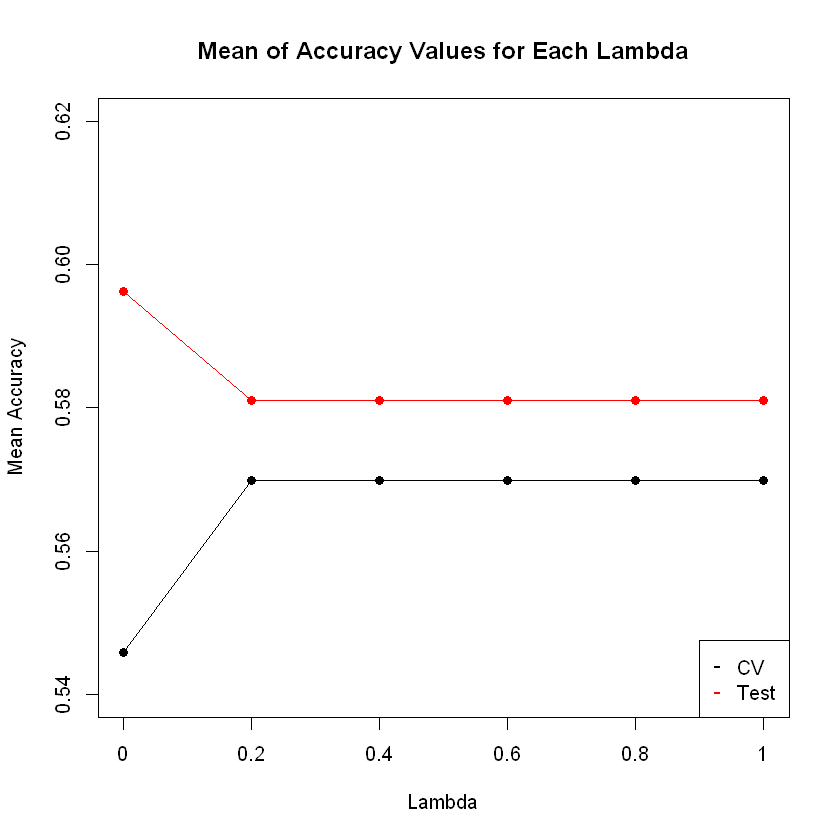

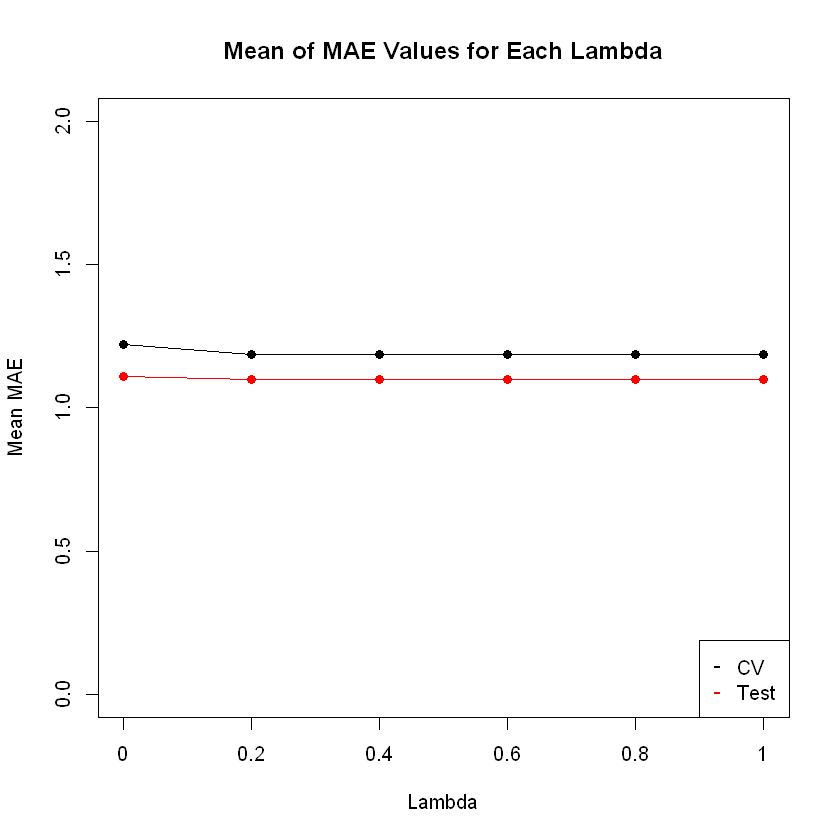

In [23]:
install.packages('TunePareto')
library(TunePareto)

#Cross Validation for Classification :
train_class_pr <- train_class
test_class_pr <- test_class[,1:10]

lambda = seq(0, 1, 0.2)
nFolds=10
nofReplications=1

set.seed(1)
indices=generateCVRuns(train_class_pr$total_goals_class,nofReplications,nFolds,stratified=TRUE)
thisReplication=indices[[nofReplications]]

mean_acc_val=c()
mean_acc_test = c()

for (a in lambda){
    acc_val <- rep(0,nFolds)
    acc_test <- rep(0,nFolds)
    
    for (i in 1:nFolds) {        
        valindices=thisReplication[[i]]

        train <- train_class_pr[-valindices,]
        val <- train_class_pr[valindices,]
        
        # A model is built as following :
        pr=glmnet(as.matrix(train[,1:9]),train[,10],family="binomial",lambda=a)
        
        # Predicting class values for both validation and test data sets :
        val$pred=predict(pr,newx=as.matrix(val[,1:9]),type="class")
        test_class_pr$pred=predict(pr,newx=as.matrix(test_class_pr[,1:9]),type="class")
        
        # Calculating Accuracy values as following :
        acc_val[i] <- round(Accuracy(val$total_goals_class , val$pred),3)
        acc_test[i] <- round(Accuracy(test_class_pr$total_goals_class , test_class_pr$pred),3)
        
    }

    # Saving mean accuracy values for each lambda values :
    mean_acc_val=c(mean_acc_val,mean(acc_val))
    mean_acc_test=c(mean_acc_test,mean(acc_test))
    
}


#Plotting Accuracy Values for each Lambda value :
plot(mean_acc_val,type="o",pch=16,col="black",ylim = c(0.54, 0.62), xaxt="n",xlab="Lambda"
     ,ylab="Mean Accuracy",main="Mean of Accuracy Values for Each Lambda")
points(mean_acc_test,type="o",pch=16,col="red")
axis(side=1,at=seq_along(lambda),labels=lambda)
legend(x = "bottomright" , legend = c("CV","Test"),col=c("black","red"),pch="-")



#Cross Validation for Regression :
train_reg_pr <- train_reg_NA
test_reg_pr <- test_reg_NA[,1:10]

set.seed(1)
indices=generateCVRuns(train_reg_pr$total_goals,nofReplications,nFolds,stratified=TRUE)
thisReplication=indices[[nofReplications]]

mean_mae_val=c()
mean_mae_test = c()

for (a in lambda){
    mae_val <- rep(0,nFolds)
    mae_test <- rep(0,nFolds)
    
    for (i in 1:nFolds) {        
        valindices=thisReplication[[i]]

        train <- train_reg_pr[-valindices,]
        val <- train_reg_pr[valindices,]
        
        # A model is built as following :
        pr=glmnet(as.matrix(train[,1:9]),train[,10],lambda=a)
        
        # Predicting total goals for both validation and test data sets :
        val$pred=round(predict(pr,newx=as.matrix(val[,1:9])))
        test_reg_pr$pred=round(predict(pr,newx=as.matrix(test_reg_pr[,1:9])))
        
        # Calculating MAE values as following :
        mae_val[i] <- round(MAE(val$total_goals, val$pred),3)
        mae_test[i] <- round(MAE(test_reg_pr$total_goals, test_reg_pr$pred),3)
        
    }

    # Saving mean MAE values for each lambda values :
    mean_mae_val=c(mean_mae_val,mean(mae_val))
    mean_mae_test=c(mean_mae_test,mean(mae_test))    
}

#Plotting MAE Values for each Lambda value :
plot(mean_mae_val,type="o",pch=16,col="black", ylim=c(0,2),xaxt="n",xlab="Lambda"
     ,ylab="Mean MAE",main="Mean of MAE Values for Each Lambda")
points(mean_mae_test,type="o",pch=16,col="red")
axis(side=1,at=seq_along(lambda),labels=lambda)
legend(x = "bottomright" , legend = c("CV","Test"),col=c("black","red"),pch="-")



#### In conclusion, lambda=0 value is the best for classification problem, whereas lambda = 0.2 value is the best for regression problem with penalized regression.

## Cross Validation for Decision Tree

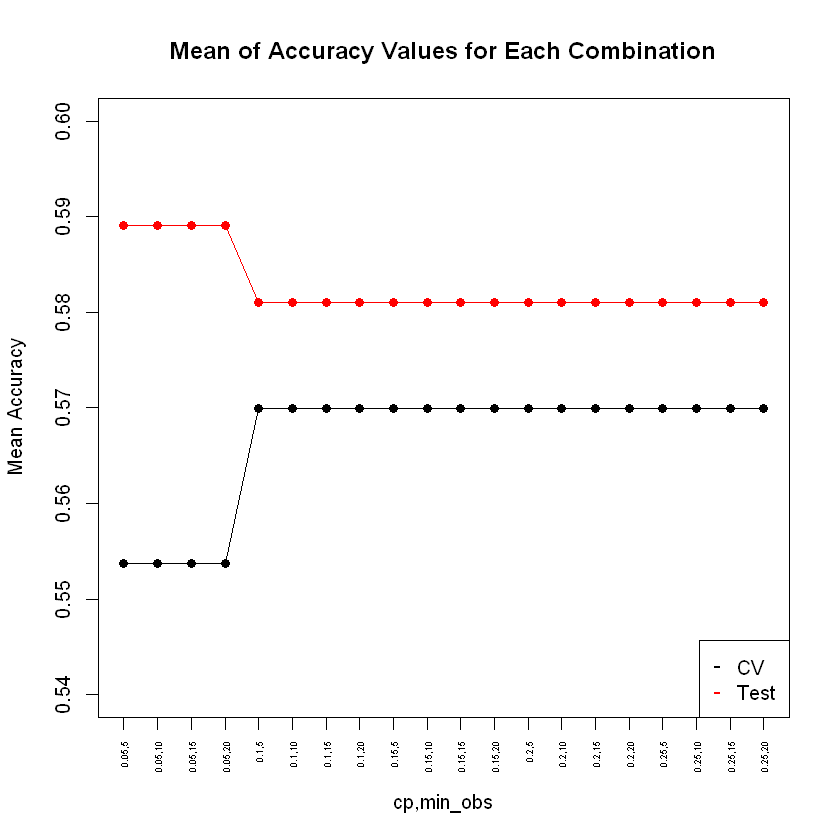

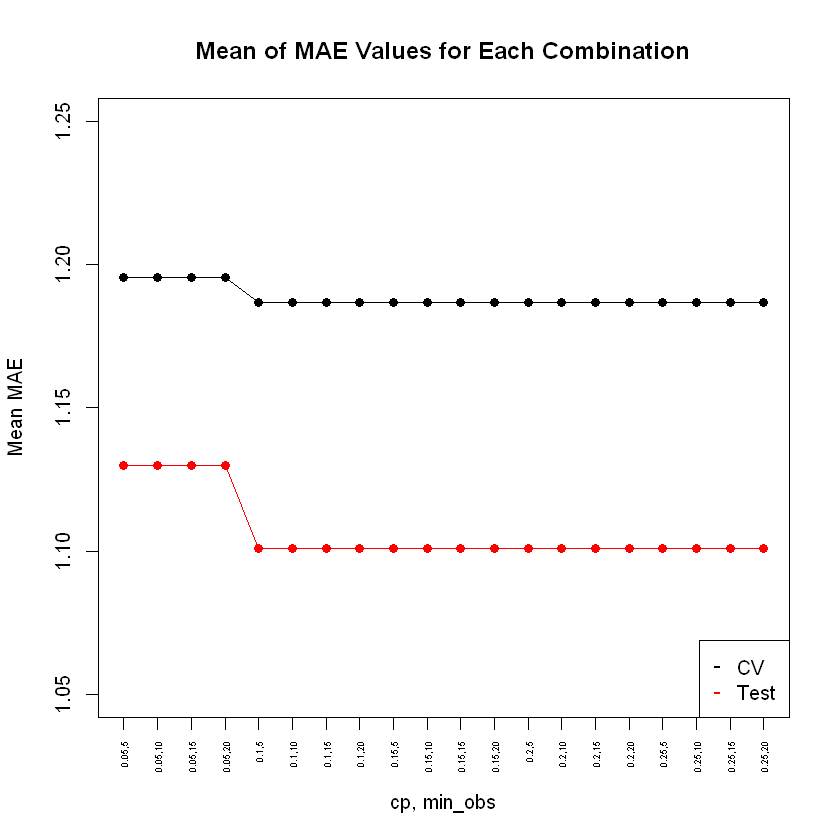

In [24]:
#Cross Validation for Classification :
train_class_dt <- train_class
test_class_dt <- test_class[,1:10]

cp=seq(0.05,0.25,0.05)
min_obs=seq(5,20,5)

nFolds=10
nofReplications=1

set.seed(1)
indices=generateCVRuns(train_class_dt$total_goals_class,nofReplications,nFolds,stratified=TRUE)
thisReplication=indices[[nofReplications]]


mean_acc_val=c()
mean_acc_test = c()

for (a in cp){
    for (b in min_obs) {
        acc_val <- rep(0,nFolds)
        acc_test <- rep(0,nFolds)
    
        for (i in 1:nFolds) {        
            valindices=thisReplication[[i]]

            train <- train_class_dt[-valindices,]
            val <- train_class_dt[valindices,]
        
            # A model is built as following :
            dt=rpart(total_goals_class~.,data=train,method='class',control=rpart.control(cp=a,minobsinnode = b))
        
            # Predicting class values for both validation and test data sets :
            val$pred=predict(dt,newdata=val[,1:9],type="class")
            test_class_dt$pred=predict(dt,newdata=test_class_dt[,1:9],type="class")
        
            # Calculating Accuracy values as following :
            acc_val[i] <- round(Accuracy(val$total_goals_class , val$pred),3)
            acc_test[i] <- round(Accuracy(test_class_dt$total_goals_class , test_class_dt$pred),3)
        
    }

    # Saving mean accuracy values for each combination :
    mean_acc_val=c(mean_acc_val,mean(acc_val))
    mean_acc_test=c(mean_acc_test,mean(acc_test))
    }
}

indices=c()
for (a in cp){
    for (b in min_obs){
        indices=c(indices,paste0(a,",",b))
    }
}


#Plotting Accuracy Values for each combination :
plot(mean_acc_val,type="o",pch=16,col="black",ylim=c(0.54,0.6), xaxt="n",xlab="cp,min_obs"
     ,ylab="Mean Accuracy",main="Mean of Accuracy Values for Each Combination")
points(mean_acc_test,type="o",pch=16,col="red")
axis(side=1,at=seq_along(indices),labels=indices, cex.axis=0.45,las=2)
legend(x = "bottomright" , legend = c("CV","Test"),col=c("black","red"),pch="-")



#Cross Validation for Regression :
train_reg_dt <- train_reg_NA
test_reg_dt <- test_reg_NA[,1:10]

set.seed(1)
indices=generateCVRuns(train_reg_dt$total_goals,nofReplications,nFolds,stratified=TRUE)
thisReplication=indices[[nofReplications]]


mean_mae_val=c()
mean_mae_test = c()

for (a in cp){
    for (b in min_obs) {
        mae_val <- rep(0,nFolds)
        mae_test <- rep(0,nFolds)
    
        for (i in 1:nFolds) {        
            valindices=thisReplication[[i]]

            train <- train_reg_dt[-valindices,]
            val <- train_reg_dt[valindices,]
        
            # A model is built as following :
            dt=rpart(total_goals~.,data=train,control=rpart.control(cp=a,minobsinnode = b))
        
            # Predicting total goals for both validation and test data sets :
            val$pred=round(predict(dt,newdata=val[,1:9]))
            test_reg_dt$pred=round(predict(dt,newdata=test_reg_dt[,1:9]))
        
            # Calculating MAE values as following :
            mae_val[i] <- round(MAE(val$total_goals , val$pred),3)
            mae_test[i] <- round(MAE(test_reg_dt$total_goals, test_reg_dt$pred),3)
        
    }

    # Saving mean MAE values for each combination :
    mean_mae_val=c(mean_mae_val,mean(mae_val))
    mean_mae_test=c(mean_mae_test,mean(mae_test))
    }
}

indices=c()
for (a in cp){
    for (b in min_obs){
        indices=c(indices,paste0(a,",",b))
    }
}


#Plotting MAE Values for each combination :
plot(mean_mae_val,type="o",pch=16,col="black", ylim=c(1.05,1.25), xaxt="n",xlab="cp, min_obs"
     ,ylab="Mean MAE",main="Mean of MAE Values for Each Combination")
points(mean_mae_test,type="o",pch=16,col="red")
axis(side=1,at=seq_along(indices),labels=indices, cex.axis=0.45,las=2)
legend(x = "bottomright" , legend = c("CV","Test"),col=c("black","red"),pch="-")


#### In conclusion, min_obs value isn't significant since it doesn't have any effect on the results. cp=0.05 and min_obs=10 is chosen for classification problem and cp = 0.1 and min_obs = 10 values are chosen for regression problem with decision tree.

## Cross Validation for Random Forest

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...)

[1] "Mean Accuracy Values for Validation"
[1] 0.5134 0.5277 0.5359 0.5236 0.5277
[1] "Mean Accuracy Values for Test"
[1] 0.7900 0.7979 0.7971 0.7919 0.7905


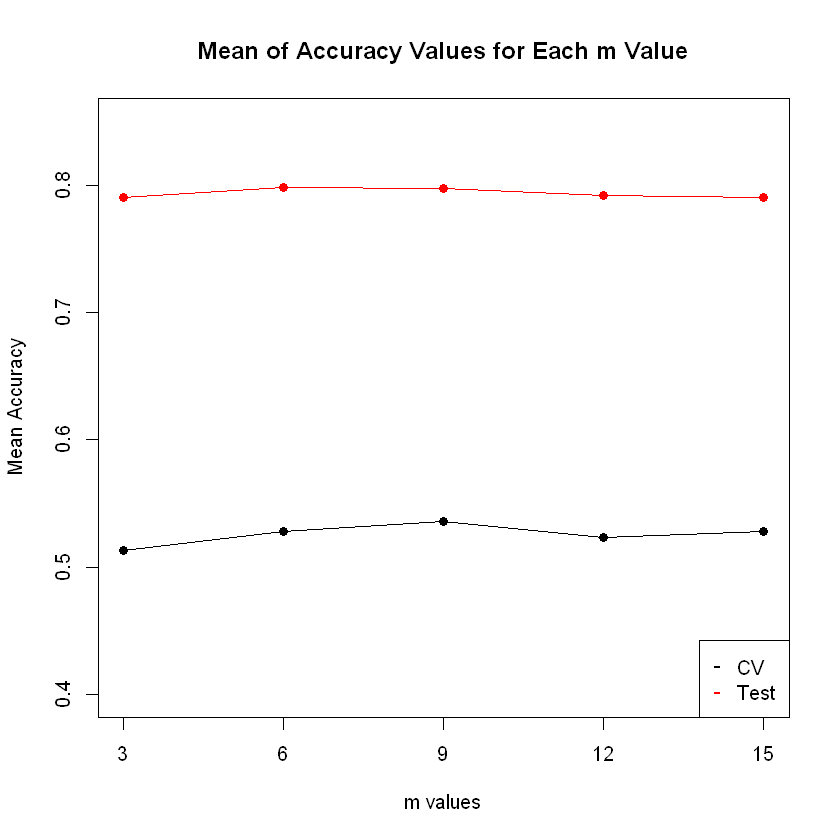

In [25]:
#Cross Validation for Classification :
train_class_rf <- train_class
test_class_rf <- test_class[,1:10]

m_val = seq(3,15,3)
nFolds=10
nofReplications=1

set.seed(1)
indices=generateCVRuns(train_class_rf$total_goals_class,nofReplications,nFolds,stratified=TRUE)
thisReplication=indices[[nofReplications]]

mean_acc_val=c()
mean_acc_test = c()

for (a in m_val){
    acc_val <- rep(0,nFolds)
    acc_test <- rep(0,nFolds)
    
    for (i in 1:nFolds) {        
        valindices=thisReplication[[i]]

        train <- train_class_rf[-valindices,]
        val <- train_class_rf[valindices,]
        
        # A model is built as following :
        rf=randomForest(total_goals_class~.,data=na.roughfix(train),minobsinnode = 5, mtry=a,n.trees= 500, 
                        na.action=na.roughfix)
        
        # Predicting class values for both validation and test data sets :
        val$pred=predict(rf,newdata=val[,1:9])
        test_class_rf$pred=predict(rf, newdata=na.roughfix(test_class_rf[,1:9]))
        
        # Calculating Accuracy values as following :
        acc_val[i] <- round(Accuracy(val$total_goals_class , val$pred),3)
        acc_test[i] <- round(Accuracy(test_class_rf$total_goals_class , test_class_rf$pred),3)
        
    }

    # Saving mean accuracy values for each lambda values :
    mean_acc_val=c(mean_acc_val,mean(acc_val))
    mean_acc_test=c(mean_acc_test,mean(acc_test))
    
}
print("Mean Accuracy Values for Validation")
print(mean_acc_val)
print("Mean Accuracy Values for Test")
print(mean_acc_test)

#Plotting Accuracy Values for each Lambda value :
plot(mean_acc_val,type="o",pch=16,col="black",ylim = c(0.4,0.85), xaxt="n",xlab="m values"
     ,ylab="Mean Accuracy",main="Mean of Accuracy Values for Each m Value")
points(mean_acc_test,type="o",pch=16,col="red")
axis(side=1,at=seq_along(m_val),labels=m_val)
legend(x = "bottomright" , legend = c("CV","Test"),col=c("black","red"),pch="-")

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...)

[1] "Mean MAE Values for Validation"
[1] 1.1826 1.2130 1.2084 1.1998 1.1956
[1] "Mean MAE Values for Test"
[1] 0.7696 0.7656 0.7597 0.7544 0.7597


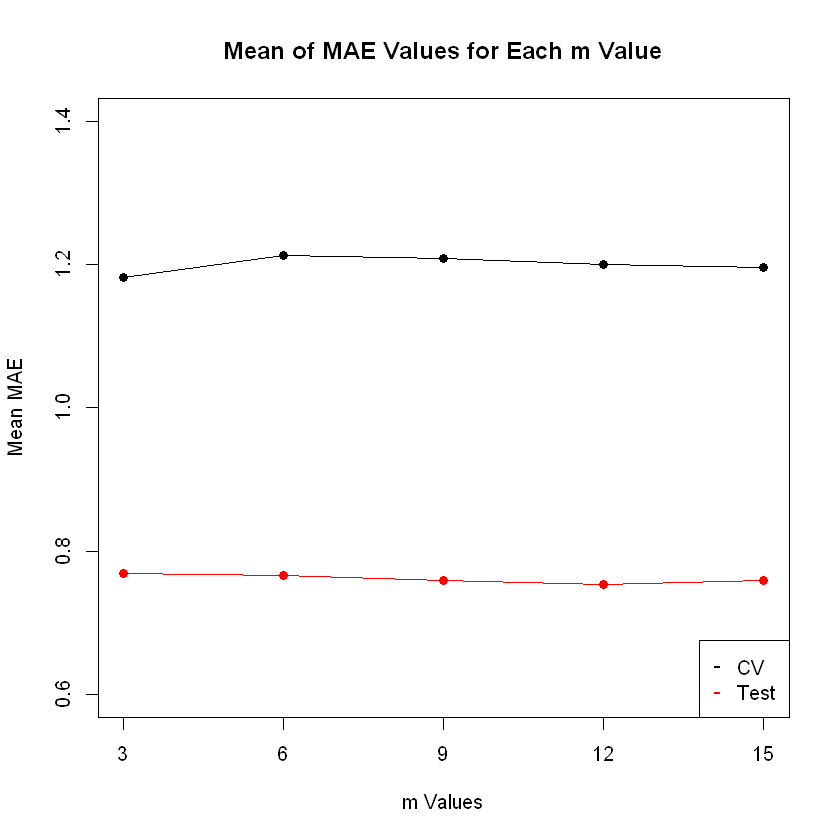

In [26]:
#Cross Validation for Regression :
train_reg_rf <- train_reg_NA
test_reg_rf <- test_reg_NA[,1:10]

set.seed(1)
indices=generateCVRuns(train_reg_rf$total_goals,nofReplications,nFolds,stratified=TRUE)
thisReplication=indices[[nofReplications]]

mean_mae_val=c()
mean_mae_test = c()

for (a in m_val){
    mae_val <- rep(0,nFolds)
    mae_test <- rep(0,nFolds)
    
    for (i in 1:nFolds) {        
        valindices=thisReplication[[i]]

        train <- train_reg_rf[-valindices,]
        val <- train_reg_rf[valindices,]
        
        # A model is built as following :
        rf=randomForest(total_goals~.,data=na.roughfix(train),minobsinnode = 5, mtry=a, n.trees=500, ,na.action=na.roughfix)
        
        # Predicting total goals for both validation and test data sets :
        val$pred=round(predict(rf,newdata=val[,1:9]))
        test_reg_rf$pred=round(predict(rf,newdata=test_reg_rf[,1:9]))
        
        # Calculating MAE values as following :
        mae_val[i] <- round(MAE(val$total_goals, val$pred),3)
        mae_test[i] <- round(MAE(test_reg_rf$total_goals, test_reg_rf$pred),3)
        
    }

    # Saving mean MAE values for each lambda values :
    mean_mae_val=c(mean_mae_val,mean(mae_val))
    mean_mae_test=c(mean_mae_test,mean(mae_test))
}

print("Mean MAE Values for Validation")
print(mean_mae_val)
print("Mean MAE Values for Test")
print(mean_mae_test)

#Plotting MAE Values for each Lambda value :
plot(mean_mae_val,type="o",pch=16,col="black", ylim=c(0.6,1.4),xaxt="n",xlab="m Values"
     ,ylab="Mean MAE",main="Mean of MAE Values for Each m Value")
points(mean_mae_test,type="o",pch=16,col="red")
axis(side=1,at=seq_along(m_val),labels=m_val)
legend(x = "bottomright" , legend = c("CV","Test"),col=c("black","red"),pch="-")


#### In conclusion, while m=9 is the best for classification problem, m=12 is the best for regression problem with random forest.

## Cross Validation for Stochastic Gradient Boosting

[1] "Mean MAE Values for Validation"
 [1] 1.1085 0.9436 0.8654 0.8087 0.5261 0.3391 0.6566 0.2650 0.0910 1.0824
[11] 0.8393 0.7088 0.7481 0.3564 0.1695 0.5393 0.1128 0.0302 1.0912 0.8307
[21] 0.7263 0.7393 0.3303 0.1650 0.5087 0.0998 0.0216
[1] "Mean MAE Values for Test"
 [1] 1.0780 1.0403 0.9990 0.9990 0.8029 0.6719 0.8939 0.6656 0.5789 1.0444
[11] 1.0090 0.9220 0.9313 0.6838 0.6150 0.8232 0.6020 0.5292 1.0515 0.9808
[21] 0.9270 0.9281 0.6969 0.6242 0.8050 0.5909 0.5363


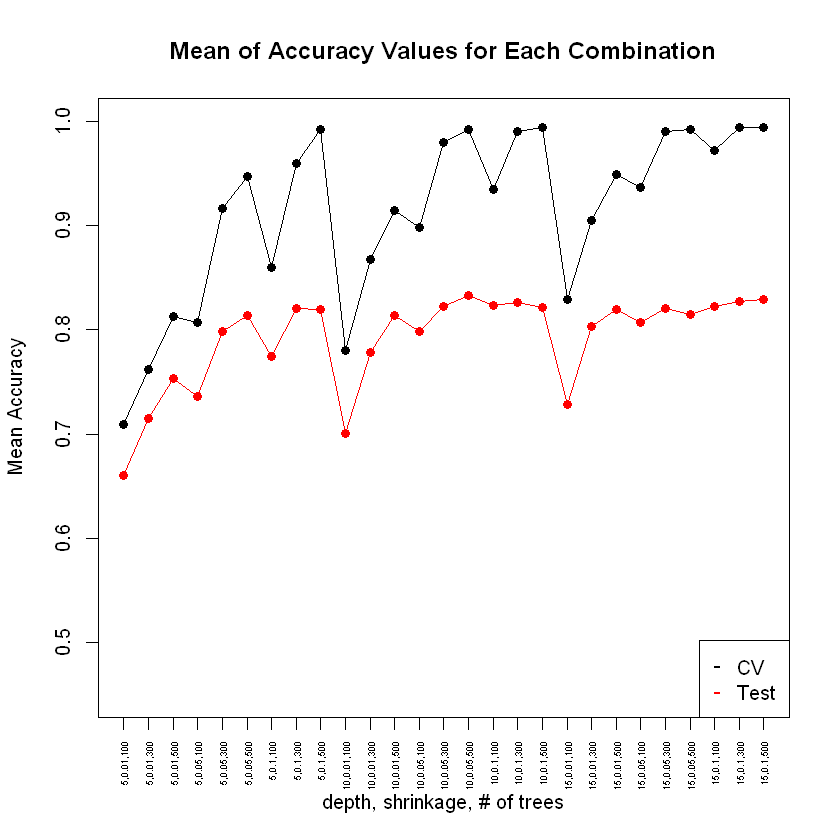

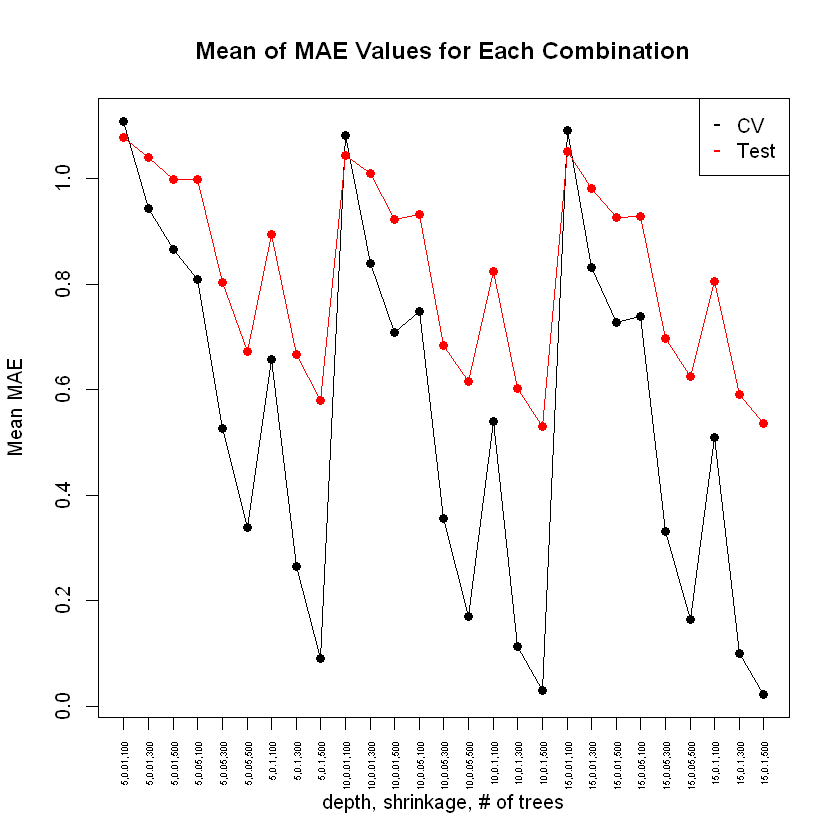

In [27]:
#Cross Validation for Classification :
train_class_sgb = train_class
test_class_sgb = test_class[,1:10]

depth = c(5,10,15)
learning_rate = c(0.01,0.05,0.1)
no_trees = c(100,300,500)

nFolds=10
nofReplications=1

set.seed(1)
indices=generateCVRuns(train_class_sgb$total_goals_class,nofReplications,nFolds,stratified=TRUE)
thisReplication=indices[[nofReplications]]


mean_acc_val=c()
mean_acc_test = c()

for (a in depth){
    for (b in learning_rate) {
        for (c in no_trees) {
            acc_val <- rep(0,nFolds)
            acc_test <- rep(0,nFolds)
    
            for (i in 1:nFolds) {        
                valindices=thisReplication[[i]]

                train <- train_class_sgb[-valindices,]
                val <- train_class_sgb[valindices,]
        
                # A model is built as following :
                sgb=gbm(total_goals_class ~.,data = train_class_sgb,distribution = "multinomial",shrinkage = b,
                        interaction.depth = a, n.minobsinnode = 10,n.trees = c)
        
                # Predicting class values for both validation and test data sets :
                val$pred=predict.gbm(object = sgb,newdata = val[,1:9],n.trees = c, type = "response")
                val$pred = colnames(val$pred)[apply(val$pred, 1, which.max)]
                test_class_sgb$pred=predict(sgb,newdata=test_class_sgb[,1:9],n.trees = c, type = "response")
                test_class_sgb$pred = colnames(test_class_sgb$pred)[apply(test_class_sgb$pred, 1, which.max)]
        
                # Calculating Accuracy values as following :
                acc_val[i] <- round(Accuracy(val$total_goals_class , val$pred),3)
                acc_test[i] <- round(Accuracy(test_class_sgb$total_goals_class , test_class_sgb$pred),3)
        
            }

            # Saving mean accuracy values for each combination :
            mean_acc_val=c(mean_acc_val,mean(acc_val))
            mean_acc_test=c(mean_acc_test,mean(acc_test))
        }
    }
}

indices=c()
for (a in depth){
    for (b in learning_rate){
        for (c in no_trees){
            indices=c(indices,paste0(a,",",b,",",c))
        }
    }
}


#Plotting Accuracy Values for each combination :
plot(mean_acc_val,type="o",pch=16,col="black",ylim=c(0.45,1), xaxt="n",xlab="depth, shrinkage, # of trees"
     ,ylab="Mean Accuracy",main="Mean of Accuracy Values for Each Combination")
points(mean_acc_test,type="o",pch=16,col="red")
axis(side=1,at=seq_along(indices),labels=indices, cex.axis=0.45,las=2)
legend(x = "bottomright" , legend = c("CV","Test"),col=c("black","red"),pch="-")




#Cross Validation for Regression :
train_reg_sgb = train_reg_NA
test_reg_sgb = test_reg_NA[,1:10]

set.seed(1)
indices=generateCVRuns(train_reg_sgb$total_goals,nofReplications,nFolds,stratified=TRUE)
thisReplication=indices[[nofReplications]]


mean_mae_val=c()
mean_mae_test = c()

for (a in depth){
    for (b in learning_rate) {
        for (c in no_trees) {
            mae_val <- rep(0,nFolds)
            mae_test <- rep(0,nFolds)
    
            for (i in 1:nFolds) {        
                valindices=thisReplication[[i]]

                train <- train_reg_sgb[-valindices,]
                val <- train_reg_sgb[valindices,]
        
                # A model is built as following :
                sgb=gbm(total_goals ~.,data = train_reg_sgb,distribution = "gaussian",shrinkage = b,
                        interaction.depth = a, n.minobsinnode = 10,n.trees = c)
        
                # Predicting total goals for both validation and test data sets :
                val$pred=round(predict.gbm(object = sgb,newdata = val[,1:9],n.trees = c))
                test_reg_sgb$pred=round(predict.gbm(object = sgb,newdata = test_reg_sgb[,1:9],n.trees = c))
        
                # Calculating MAE values as following :
                mae_val[i] <- round(MAE(val$total_goals, val$pred),3)
                mae_test[i] <- round(MAE(test_reg_sgb$total_goals, test_reg_sgb$pred),3)
        
            }

            # Saving mean MAE values for each combination :
            mean_mae_val=c(mean_mae_val,mean(mae_val))
            mean_mae_test=c(mean_mae_test,mean(mae_test))
        }
    }
}

indices=c()
for (a in depth){
    for (b in learning_rate){
        for (c in no_trees){
            indices=c(indices,paste0(a,",",b,",",c))
        }
    }
}

print("Mean MAE Values for Validation")
print(mean_mae_val)
print("Mean MAE Values for Test")
print(mean_mae_test)

#Plotting MAE Values for each combination :
plot(mean_mae_val,type="o",pch=16,col="black", xaxt="n",xlab="depth, shrinkage, # of trees"
     ,ylab="Mean MAE",main="Mean of MAE Values for Each Combination")
points(mean_mae_test,type="o",pch=16,col="red")
axis(side=1,at=seq_along(indices),labels=indices, cex.axis=0.45,las=2)
legend(x = "topright" , legend = c("CV","Test"),col=c("black","red"),pch="-")

#### In conclusion,  while depth = 10, shrinkage=0.05, number of trees=500 combination is the best for classification problem, depth=10, shrinkage=0.1, number of trees = 500 combination is the best for regression problem with stochastic gradient boosting under these assumptions.

# TASK 4

#### According to parameters which are chosen in Task 3, models are constructed for each method as following : 

In [28]:
Summary = matrix(nrow=4,ncol=2)
colnames(Summary) = c("Accuracy","MAE")
rownames(Summary) = c("Penalized Regression", "Decision Tree","Random Forest","Stoch. Gra. Boosting")


#PENALIZED REGRESSION
#For penalized regression, lambda is chosen as 0 for classification problem in Task 3.
#Building the penalized regression model for classification as following:
train_class_pr <- train_class
test_class_pr <- test_class[,1:10]
class_pr=glmnet(as.matrix(train_class_pr[,1:9]),train_class_pr[,10],family="binomial", lambda=0)
test_class_pr$pred=predict(class_pr,newx=as.matrix(test_class_pr[,1:9]),type="class")
Summary[1,1] = round(Accuracy(test_class_pr$total_goals_class, test_class_pr$pred),2)

#For penalized regression, lambda is chosen as 0.2 for regression problem in Task 3.
#Building the penalized regression model for regression as following:
train_reg_pr <- train_reg_NA
test_reg_pr <- test_reg_NA[,1:10]
reg_pr=glmnet(as.matrix(train_reg_pr[,1:9]),train_reg_pr[,10], family="gaussian", lambda=0.2)
test_reg_pr$pred=predict(reg_pr,newx=as.matrix(test_reg_pr[,1:9]))
Summary[1,2] = round(MAE(test_reg_pr$total_goals , test_reg_pr$pred),3)


#DECISION TREE
#For decision tree, cp = 0.05 and min_obs = 10 values are chosen for classification in Task 3.
#Building the decision tree for classification as following:
train_class_dt <- train_class
test_class_dt <- test_class[,1:10]
class_dt=rpart(total_goals_class~.,data=train_class_dt,method='class',control=rpart.control(cp=0.05,minobsinnode = 10))
test_class_dt$pred=predict(class_dt, newdata=test_class_dt[,1:9],type="class")
Summary[2,1]=round(Accuracy(test_class_dt$total_goals_class , test_class_dt$pred),2)

#For decision tree, cp = 0.1 and min_obs = 10 values are chosen for regression in Task 3.
#Building the decision tree for regression as following:
train_reg_dt <- train_reg_NA
test_reg_dt <- test_reg_NA[,1:10]
reg_dt=rpart(total_goals~.,data=train_reg_dt,control=rpart.control(cp=0.1,minobsinnode = 10))
test_reg_dt$pred=round(predict(reg_dt, newdata=test_reg_dt[,1:9]))
Summary[2,2] = round(MAE(test_reg_dt$total_goals , test_reg_dt$pred),3)


#RANDOM FOREST
#For random forest, m=9 is chosen for classification problem in Task 3.
#Building the random forest model for classification as following:
train_class_rf <- train_class
test_class_rf <- test_class[,1:10]
class_rf = randomForest(total_goals_class~.,data=na.roughfix(train_class_rf),mtry=9,minobsinnode = 10,na.action=na.roughfix)
test_class_rf$pred=predict(class_rf, newdata=na.roughfix(test_class_rf[,1:9]))
Summary[3,1] = round(Accuracy(test_class_rf$total_goals_class , test_class_rf$pred),2)

#For random forest, m=12 is chosen for regression problem in Task 3.
#Building the decision tree for regression as following:
train_reg_rf <- train_reg_NA
test_reg_rf <- test_reg_NA[,1:10]
reg_rf = randomForest(total_goals~.,data=na.roughfix(train_reg_rf),mtry=12,minobsinnode = 10,na.action=na.roughfix)
test_reg_rf$pred=round(predict(reg_rf, newdata=na.roughfix(test_reg_rf[,1:9])))
Summary[3,2] = round(MAE(test_reg_rf$total_goals, test_reg_rf$pred),3)


#STOCHASTIC GRADIENT BOOSTING 
#For stochastic gradient boosting, depth = 10, shrinkage=0.05, number of trees=500 combination is chosen in Task 3.
#Building the stochastic gradient boosting model for classification as following:
train_class_sgb = train_class
test_class_sgb = test_class[,1:10]
class_sgb = gbm(total_goals_class ~.,data = train_class_sgb,distribution = "multinomial",shrinkage = 0.05,
                interaction.depth = 10, n.minobsinnode = 10,n.trees = 500)
test_class_sgb$pred=predict.gbm(object = class_sgb,newdata = test_class_sgb[,1:9],n.trees = 100, type = "response")
test_class_sgb$pred = colnames(test_class_sgb$pred)[apply(test_class_sgb$pred, 1, which.max)]
Summary[4,1] = round(Accuracy(test_class_sgb$total_goals_class , test_class_sgb$pred),2)

#For stochastic gradient boosting, depth=10, shrinkage=0.1, number of trees = 500 combination is chosen in Task 3.
#Building the stochastic gradient boosting for regression as following:
train_reg_sgb = train_reg_NA
test_reg_sgb = test_reg_NA[,1:10]
reg_sgb = gbm(total_goals~.,data = train_reg_sgb, shrinkage = 0.1,distribution = "gaussian",interaction.depth = 10,
              n.minobsinnode = 10,n.trees = 500)
test_reg_sgb$pred=round(predict.gbm(object = reg_sgb,newdata = test_reg_sgb[,1:9],n.trees = 100))
Summary[4,2] = round(MAE(test_reg_sgb$total_goals , test_reg_sgb$pred),3)
Summary

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"

,Accuracy,MAE
Penalized Regression,0.60,1.112
Decision Tree,0.58,1.101
Random Forest,0.82,0.707
Stoch. Gra. Boosting,0.81,0.778


#### In conclusion,  Random Forest method has the best performance for both classification and regression problems.

#### In general, cross-validation error and test error are consistent between each other, since changes in CV-error and test error have similar shape in the plot. For random forest and stochastic gradient boosting methods, it can be seen some inconsistency between CV-error and test-error; however, since the values obtained are quite close to each other, it can be evaluated as not so much important. 

#### When we look at the plots in Task 3, it can be added some remarks about overfitting and underfitting situations. For penalized regression, when lambda is equal to 0.2, this situation is best for classification, but it is underfitting situation for regression. In addition, when lambda is greater than 0.2, it is overfitting for classification, however, it is best and the same values for regression. 

#### For decision tree, when cp equals to 0.05, it is best for classification, but it is underfitting for regression. Moreover, when cp is greater than 0.05, it is overfitting for classification, however,  it is best and the same values for regression. Also, as mentioned earlier, min_obs value doesn't affect the result for decision tree for this data.


#### For both random forest and stochastic gradient boosting, we can't say anything about underfitting and overfitting. It can be said that parameters can be changed, later it can be evaluated again. Under these assumptions, we can't say anything according to plots.